Cargamos las librerias

In [1309]:
import numpy as np
import pandas as pd
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestRegressor    

Cargamos los datasets

In [1310]:
# Carga de datasets

filepatch_audi = ('/content/drive/MyDrive/Personal/Proyecto_Coches/datasets/audi.csv') 
filepatch_bmw = ('/content/drive/MyDrive/Personal/Proyecto_Coches/datasets/bmw.csv')
filepatch_ford = ('/content/drive/MyDrive/Personal/Proyecto_Coches/datasets/ford.csv')
filepatch_hyundai = ('/content/drive/MyDrive/Personal/Proyecto_Coches/datasets/hyundi.csv')
filepatch_mercedes = ('/content/drive/MyDrive/Personal/Proyecto_Coches/datasets/merc.csv')
filepatch_skoda = ('/content/drive/MyDrive/Personal/Proyecto_Coches/datasets/skoda.csv')
filepatch_toyota = ('/content/drive/MyDrive/Personal/Proyecto_Coches/datasets/toyota.csv')
filepatch_vauxhall = ('/content/drive/MyDrive/Personal/Proyecto_Coches/datasets/vauxhall.csv')
filepatch_vw = ('/content/drive/MyDrive/Personal/Proyecto_Coches/datasets/vw.csv')

dfaudi = pd.read_csv(filepatch_audi)
dfbmw = pd.read_csv(filepatch_bmw)
dfford = pd.read_csv(filepatch_ford)
dfhyundai = pd.read_csv(filepatch_hyundai)
dfmercedes = pd.read_csv(filepatch_mercedes)
dfskoda = pd.read_csv(filepatch_skoda)
dftoyota = pd.read_csv(filepatch_toyota)
dfvauxhall = pd.read_csv(filepatch_vauxhall)
dfvw = pd.read_csv(filepatch_vw)

#### Unimos los datasets

In [1311]:
coches_list = [dfaudi, dfbmw, dfford, dfhyundai, dfmercedes, dfskoda, dftoyota, 
               dfvauxhall, dfvw]

cars = pd.concat(coches_list)

In [1312]:
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,NaN
15153,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,NaN
15154,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,NaN
15155,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,NaN


### Tratamiento de los datos

#### Miramos si tenemos nulos

In [1313]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99187 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           94327 non-null  float64
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   tax(£)        4860 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 8.3+ MB


In [1314]:
cars[cars['tax'].isnull()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,I20,2017,7999,Manual,17307,Petrol,NaN,58.9,1.2,145.0
1,Tucson,2016,14499,Automatic,25233,Diesel,NaN,43.5,2.0,235.0
2,Tucson,2016,11399,Manual,37877,Diesel,NaN,61.7,1.7,30.0
3,I10,2016,6499,Manual,23789,Petrol,NaN,60.1,1.0,20.0
4,IX35,2015,10199,Manual,33177,Diesel,NaN,51.4,2.0,160.0
...,...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,NaN,78.4,1.6,0.0
4856,I40,2015,7830,Manual,59508,Diesel,NaN,65.7,1.7,30.0
4857,I10,2017,6830,Manual,13810,Petrol,NaN,60.1,1.0,20.0
4858,Tucson,2018,13994,Manual,23313,Petrol,NaN,44.8,1.6,145.0


In [1315]:
cars[cars['tax(£)'].notnull()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,I20,2017,7999,Manual,17307,Petrol,NaN,58.9,1.2,145.0
1,Tucson,2016,14499,Automatic,25233,Diesel,NaN,43.5,2.0,235.0
2,Tucson,2016,11399,Manual,37877,Diesel,NaN,61.7,1.7,30.0
3,I10,2016,6499,Manual,23789,Petrol,NaN,60.1,1.0,20.0
4,IX35,2015,10199,Manual,33177,Diesel,NaN,51.4,2.0,160.0
...,...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,NaN,78.4,1.6,0.0
4856,I40,2015,7830,Manual,59508,Diesel,NaN,65.7,1.7,30.0
4857,I10,2017,6830,Manual,13810,Petrol,NaN,60.1,1.0,20.0
4858,Tucson,2018,13994,Manual,23313,Petrol,NaN,44.8,1.6,145.0


In [1316]:
cars['mpg'].max()

470.8

Como se puede ver tenemos nulos, pero que los datos de tax estan guardados en tax(£), por lo que procedo al copiado de dichos valores a la columna tax y posteriormente borrar la columna tax(£)

In [1317]:
# Pasamos los datos de tax(£) a tax
cars['tax'].fillna(cars['tax(£)'], inplace=True)

Comprobamos que no tenemos ya nulos y vemos si los datos en la columna tax son iguales que en la de tax(£)

In [1318]:
cars[cars['tax'].isnull()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)


In [1319]:
cars[cars['tax(£)'].notnull()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,tax(£)
0,I20,2017,7999,Manual,17307,Petrol,145.0,58.9,1.2,145.0
1,Tucson,2016,14499,Automatic,25233,Diesel,235.0,43.5,2.0,235.0
2,Tucson,2016,11399,Manual,37877,Diesel,30.0,61.7,1.7,30.0
3,I10,2016,6499,Manual,23789,Petrol,20.0,60.1,1.0,20.0
4,IX35,2015,10199,Manual,33177,Diesel,160.0,51.4,2.0,160.0
...,...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0.0,78.4,1.6,0.0
4856,I40,2015,7830,Manual,59508,Diesel,30.0,65.7,1.7,30.0
4857,I10,2017,6830,Manual,13810,Petrol,20.0,60.1,1.0,20.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145.0,44.8,1.6,145.0


Visionamos de nuevo los datos de dataframe donde podemos ver que ya no tenemos nulos en tax

In [1320]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99187 entries, 0 to 15156
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  float64
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
 9   tax(£)        4860 non-null   float64
dtypes: float64(4), int64(3), object(3)
memory usage: 8.3+ MB


Ahora quitamos la columna tax(£)

In [1321]:
cars.drop(['tax(£)'], axis = 1, inplace = True)

Ahora volvemos a ver la información del dataframe para ver que realmente se ha quitado la columna

In [1322]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99187 entries, 0 to 15156
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         99187 non-null  object 
 1   year          99187 non-null  int64  
 2   price         99187 non-null  int64  
 3   transmission  99187 non-null  object 
 4   mileage       99187 non-null  int64  
 5   fuelType      99187 non-null  object 
 6   tax           99187 non-null  float64
 7   mpg           99187 non-null  float64
 8   engineSize    99187 non-null  float64
dtypes: float64(3), int64(3), object(3)
memory usage: 7.6+ MB


#### Ahora listo todos los modelos que tengo en el dataframe

In [1323]:
pd.unique(cars['model'])

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7',
       ' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3', ' Fiesta', ' Focus', ' Puma', ' Kuga',
       ' EcoSport', ' C-MAX', ' Mondeo', ' Ka+', ' Tourneo Custom',
       ' S-MAX', ' B-MAX', ' Edge', ' Tourneo Connect', ' Grand C-MAX',
       ' KA', ' Galaxy', ' Mustang', ' Grand Tourneo Connect', ' Fusion',
       ' Ranger', ' Streetka', ' Escort', ' Transit Tourneo', ' I20',
       ' Tucson', ' I10', ' IX35', ' I30', ' I40', ' Ioniq', ' Kona',
       ' Veloster', ' I800', ' IX20', ' Santa Fe', ' Accent', ' Terracan',
       ' Getz', ' Amica', ' SLK', ' S Class', ' SL CLASS', ' G Class',
       

Ahora voy a eliminar los espacios vacios que tengo delante de cada modelo, este paso puedo saltarmelo, pero decido al final que no, puesto que quiero trabajar con los nombres mas adelante y me es importante quitarle dicho espacio para trabajar mas comodamente

In [1324]:
cars['model'] = cars['model'].str.strip()

#### Procesado para el posterior uso en el despliegue


Aquí estoy limpiando los espacios en blanco que hay al principio de los nombres de los modelos y posteriormente saco los modelos en los que la cantidad sea menor a 50 para no tener problemas depues para la predicción.

Por último saco un array solo con los modelos, que después usare para el selector de modelos.

Audi

In [1325]:
dfaudi['model'] = dfaudi['model'].str.strip()

In [1326]:
audi = dfaudi['model'].value_counts()
audi_over_100 = audi[audi > 50]
audi_clean = dfaudi[dfaudi['model'].isin(audi_over_100.index)]

In [1327]:
audi_clean

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4


In [1328]:
audi_clean = audi_clean['model'].value_counts()
audi_clean

A3    1929
Q3    1417
A4    1381
A1    1347
A5     882
Q5     877
Q2     822
A6     748
Q7     397
TT     336
A7     122
A8     118
Q8      69
Name: model, dtype: int64

In [1329]:
audi_clean.unique()

array([1929, 1417, 1381, 1347,  882,  877,  822,  748,  397,  336,  122,
        118,   69])

BMW

In [1330]:
dfbmw['model'] = dfbmw['model'].str.strip()

In [1331]:
bmw = dfbmw['model'].value_counts()
bmw_over_100 = bmw[bmw > 50]
bmw_clean = dfbmw[dfbmw['model'].isin(bmw_over_100.index)]
bmw_clean = bmw_clean['model'].unique()

Ford


In [1332]:
dfford['model'] = dfford['model'].str.strip()

In [1333]:
ford = dfford['model'].value_counts()
ford_over_100 = bmw[bmw > 50]
ford_clean = dfford[dfford['model'].isin(ford_over_100.index)]
ford_clean = ford_clean['model'].unique()

Hyundai

In [1334]:
dfhyundai['model'] = dfhyundai['model'].str.strip()

In [1335]:
hyundai = dfhyundai['model'].value_counts()
hyundai_over_100 = hyundai[hyundai > 50]
hyundai_clean = dfhyundai[dfhyundai['model'].isin(hyundai_over_100.index)]
hyundai_clean = hyundai_clean['model'].unique()

Mercedes

In [1336]:
dfmercedes['model'] = dfmercedes['model'].str.strip()

In [1337]:
mercedes = dfmercedes['model'].value_counts()
mercedes_over_100 = mercedes[mercedes > 50]
mercedes_clean = dfmercedes[dfmercedes['model'].isin(mercedes_over_100.index)]
mercedes_clean = mercedes_clean['model'].unique()

Skoda

In [1338]:
dfskoda['model'] = dfskoda['model'].str.strip()

In [1339]:
skoda = dfskoda['model'].value_counts()
skoda_over_100 = skoda[skoda > 50]
skoda_clean = dfskoda[dfskoda['model'].isin(skoda_over_100.index)]
skoda_clean = skoda_clean['model'].unique()

Toyota

In [1340]:
dftoyota['model'] = dftoyota['model'].str.strip()

In [1341]:
toyota = dftoyota['model'].value_counts()
toyota_over_100 = toyota[toyota > 50]
toyota_clean = dftoyota[dftoyota['model'].isin(toyota_over_100.index)]
toyota_clean = toyota_clean['model'].unique()

vauxhall

In [1342]:
dfvauxhall['model'] = dfvauxhall['model'].str.strip()

In [1343]:
vauxhall = dfvauxhall['model'].value_counts()
vauxhall_over_100 = vauxhall[vauxhall > 50]
vauxhall_clean = dfvauxhall[dfvauxhall['model'].isin(vauxhall_over_100.index)]
vauxhall_clean = vauxhall_clean['model'].unique()

In [1344]:
vauxhall_clean

array(['Corsa', 'Astra', 'Viva', 'Mokka', 'Mokka X', 'Crossland X',
       'Zafira', 'Meriva', 'Zafira Tourer', 'Adam', 'Grandland X',
       'Insignia', 'GTC', 'Combo Life'], dtype=object)

volkswagen

In [1345]:
dfvw['model'] = dfvw['model'].str.strip()

In [1346]:
vw = dfvw['model'].value_counts()
vw_over_100 = vw[vw > 50]
vw_clean = dfvw[dfvw['model'].isin(vw_over_100.index)]
vw_clean = vw_clean['model'].unique()

In [1347]:
vw_clean

array(['T-Roc', 'Golf', 'Passat', 'T-Cross', 'Polo', 'Tiguan', 'Sharan',
       'Up', 'Scirocco', 'Beetle', 'Caddy Maxi Life', 'Caravelle',
       'Touareg', 'Arteon', 'Touran', 'Golf SV', 'Amarok',
       'Tiguan Allspace', 'Shuttle', 'CC'], dtype=object)

In [1348]:
joblib.dump([audi_clean, 
             bmw_clean, 
             ford_clean, 
             hyundai_clean, 
             mercedes_clean, 
             skoda_clean, 
             toyota_clean, 
             vauxhall_clean, 
             vw_clean], 'models.pkl')

['models.pkl']

#### Vuelvo a listar los modelos, pero esta vez guardandolos en una variable, ya que en el siguiente punto lo que voy a realizar es la transformación de nombres a numeros en la columna model.

Ahora quito los modelos que tienen 

In [1349]:
totalcoches = cars['model'].value_counts()
models_over_100 = totalcoches[totalcoches > 50]
cars_clean = cars[cars['model'].isin(models_over_100.index)]

In [1350]:
modelos_unicos = pd.unique(cars_clean['model'])
modelos_unicos

array(['A1', 'A6', 'A4', 'A3', 'Q3', 'Q5', 'A5', 'Q2', 'A7', 'TT', 'Q7',
       'A8', 'Q8', '5 Series', '6 Series', '1 Series', '7 Series',
       '2 Series', '4 Series', 'X3', '3 Series', 'X5', 'X4', 'X1', 'M4',
       'X2', 'X6', 'Z4', 'X7', 'Fiesta', 'Focus', 'Puma', 'Kuga',
       'EcoSport', 'C-MAX', 'Mondeo', 'Ka+', 'Tourneo Custom', 'S-MAX',
       'B-MAX', 'Edge', 'Grand C-MAX', 'KA', 'Galaxy', 'Mustang',
       'Grand Tourneo Connect', 'I20', 'Tucson', 'I10', 'IX35', 'I30',
       'I40', 'Ioniq', 'Kona', 'I800', 'IX20', 'Santa Fe', 'SLK',
       'S Class', 'SL CLASS', 'GLE Class', 'GLA Class', 'A Class',
       'B Class', 'GLC Class', 'C Class', 'E Class', 'GL Class',
       'CLS Class', 'CLA Class', 'V Class', 'M Class', 'CL Class',
       'GLS Class', 'X-CLASS', 'Octavia', 'Citigo', 'Yeti Outdoor',
       'Superb', 'Kodiaq', 'Rapid', 'Karoq', 'Fabia', 'Yeti', 'Scala',
       'Kamiq', 'GT86', 'Corolla', 'RAV4', 'Yaris', 'Auris', 'Aygo',
       'C-HR', 'Prius', 'Avensis', 'Ver

En este punto lo que he realizado es un bucle `for` el cual recorre el array creado en el punto anterior y sustituye en el dataframe el modelo por su correspondiente indice del array anterior.

In [1351]:
""" 
  Sustituimos el nombre de modelo por el indice del array que se le asigna en
  el filtro que hemos realizado con el metodo .unique.

  También vamos a pasar los los indices y valores a una lista, para despues
  convertirla en diccionario y poder usarla en el selector de coches durante
  el despliegue

"""
car_list = []

for index, model in enumerate(modelos_unicos):
    cars_clean.loc[cars_clean['model'] == model, 'model'] = index
    car_list.append((index, model))


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [1352]:
dic_cars = dict(car_list)
dic_cars

{0: 'A1',
 1: 'A6',
 2: 'A4',
 3: 'A3',
 4: 'Q3',
 5: 'Q5',
 6: 'A5',
 7: 'Q2',
 8: 'A7',
 9: 'TT',
 10: 'Q7',
 11: 'A8',
 12: 'Q8',
 13: '5 Series',
 14: '6 Series',
 15: '1 Series',
 16: '7 Series',
 17: '2 Series',
 18: '4 Series',
 19: 'X3',
 20: '3 Series',
 21: 'X5',
 22: 'X4',
 23: 'X1',
 24: 'M4',
 25: 'X2',
 26: 'X6',
 27: 'Z4',
 28: 'X7',
 29: 'Fiesta',
 30: 'Focus',
 31: 'Puma',
 32: 'Kuga',
 33: 'EcoSport',
 34: 'C-MAX',
 35: 'Mondeo',
 36: 'Ka+',
 37: 'Tourneo Custom',
 38: 'S-MAX',
 39: 'B-MAX',
 40: 'Edge',
 41: 'Grand C-MAX',
 42: 'KA',
 43: 'Galaxy',
 44: 'Mustang',
 45: 'Grand Tourneo Connect',
 46: 'I20',
 47: 'Tucson',
 48: 'I10',
 49: 'IX35',
 50: 'I30',
 51: 'I40',
 52: 'Ioniq',
 53: 'Kona',
 54: 'I800',
 55: 'IX20',
 56: 'Santa Fe',
 57: 'SLK',
 58: 'S Class',
 59: 'SL CLASS',
 60: 'GLE Class',
 61: 'GLA Class',
 62: 'A Class',
 63: 'B Class',
 64: 'GLC Class',
 65: 'C Class',
 66: 'E Class',
 67: 'GL Class',
 68: 'CLS Class',
 69: 'CLA Class',
 70: 'V Class',
 7

In [1353]:
# exportamos el diccionario
joblib.dump(dic_cars, 'diccionario_coches.pkl')

['diccionario_coches.pkl']

Selector de indice para el cambio de variable de nombre a indice en el formulario de seleccion de vehiculo

In [1354]:
coche_prueba = 'A1'

for index, coche in dic_cars.items():
  if coche == coche_prueba:
    print(index)

0


Ahora vamos a realizar las mismas operaciones pero sobre las columnas `transmission` y `fueltType`

In [1355]:
cars_clean['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype=object)

In [1356]:
cars_clean['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [1357]:
cars_clean.replace({'Electric': 0,
              'Diesel': 1,
              'Hybrid': 2,
              'Petrol': 3,
              'Other': 4,
              'Manual': 0, 
              'Automatic': 1,
              'Semi-Auto': 2,
              'Other': 3}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


#### Dataframe procesado

In [1358]:
cars_clean

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,12500,0,15735,3,150.0,55.4,1.4
1,1,2016,16500,1,36203,1,20.0,64.2,2.0
2,0,2016,11000,0,29946,3,30.0,55.4,1.4
3,2,2017,16800,1,25952,1,145.0,67.3,2.0
4,3,2019,17300,0,1998,3,145.0,49.6,1.0
...,...,...,...,...,...,...,...,...,...
15108,131,2016,12500,1,32925,1,125.0,58.9,2.0
15109,131,2013,10000,1,41394,1,145.0,53.3,2.0
15110,131,2012,6695,0,98000,1,30.0,60.1,2.0
15111,131,2015,10500,1,47637,1,125.0,58.9,2.0


### Entrenamiento del modelo

In [1359]:
y = cars_clean['price']

In [1360]:
X = cars_clean.drop(['price'], axis = 1)

Separamos los valores para test y para entrenamiento


In [1362]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.40)

In [1363]:
# Entrenamiento del modelo
coches_rf = RandomForestRegressor().fit(X_train.values, y_train.values)

print('Proceso de entrenamiento completado')

Proceso de entrenamiento completado


In [1364]:
# Predicción, ahora le pasamos los datos que tenemos para probar el modelo

"""
  Nombramos la nueva variable como y_pred, puesto que lo que obtenemos es un
  ouput, el cual hemos denominado como y, y así queda mas claro.

"""
y_pred_rf = coches_rf.predict(X_test.values)

# Precios obtenidos al comienzo del entrenamiento

"""
  Ahora lo que vamos a hacer es pasar el array y_test a una lista,
  para despues recorrerla con un for

"""

y_test_array_rf = y_test.values

print("Prec. real  Prec. estimado  Error absoluto")
for price in range(10):
  real_price = y_pred_rf[price]
  estim_price = y_test_array_rf[price]
  error_abs = abs(real_price - estim_price)
  print(f"{real_price:6.2f} {estim_price:12.2f} {error_abs:16.2f}")

Prec. real  Prec. estimado  Error absoluto
15615.67     14400.00          1215.67
6422.67      7490.00          1067.33
33002.65     28400.00          4602.65
6292.09      7000.00           707.91
8792.77     10800.00          2007.23
14083.96     13821.00           262.96
12282.64     12790.00           507.36
16397.58     17295.00           897.42
13396.63     13695.00           298.37
22098.91     20000.00          2098.91


In [1365]:
# Error
print("Error cuadrático medio: %.2f" % mean_squared_error(y_test_array_rf, 
                                                          y_pred_rf, 
                                                          squared=False))

# Coeficiente de determinación: 1 es una predicción perfecta
print("Coeficiente de determinación: %.2f" % r2_score(y_test_array_rf, y_pred_rf))

Error cuadrático medio: 2046.78
Coeficiente de determinación: 0.95


In [1366]:
car = coches_rf.predict([[62, 2018, 1, 29056, 1, 165, 58, 1.5]])
car

array([17019.97])

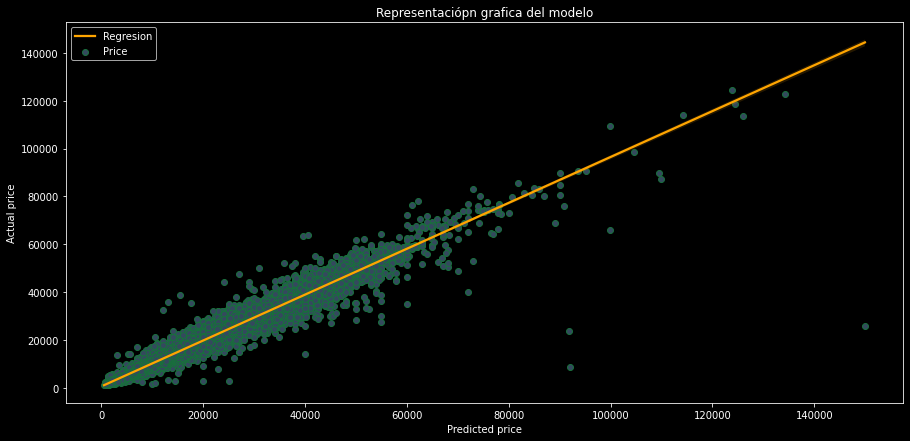

In [1367]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize = (15, 7))

ax.set_xlabel("Predicted price")
ax.set_ylabel("Actual price")
ax.set_title("Representaciópn grafica del modelo")

sns.regplot(x = y_test_array_rf,
            y = y_pred_rf,
            color = '#34495E', 
            scatter_kws={'alpha': 1, 'edgecolor': '#196F3D'}, 
            line_kws={"color": "orange"})

ax.legend(['Regresion', 'Price']);

## Exportación del modelo

In [1368]:
joblib.dump(coches_rf, 'cars_fit_model.pkl', compress=9)

['cars_fit_model.pkl']